In [1]:
import pandas as pd
import os
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from datetime import date, timedelta
import dtale
import seaborn as sns

In [2]:
viz_path = 'viz/distributions/'

In [3]:
fpath = "data/final_datasets/"
files = [fpath+f for f in os.listdir(fpath) if 'zscores' in f]
dfs = {file.split('_')[1].split('/')[-1]:pd.read_csv(file,sep=';') for file in files}
raw_data = pd.read_csv(fpath+'aggregated_dataset.csv',sep=';')

/Users/askemeineche/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning:

Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.



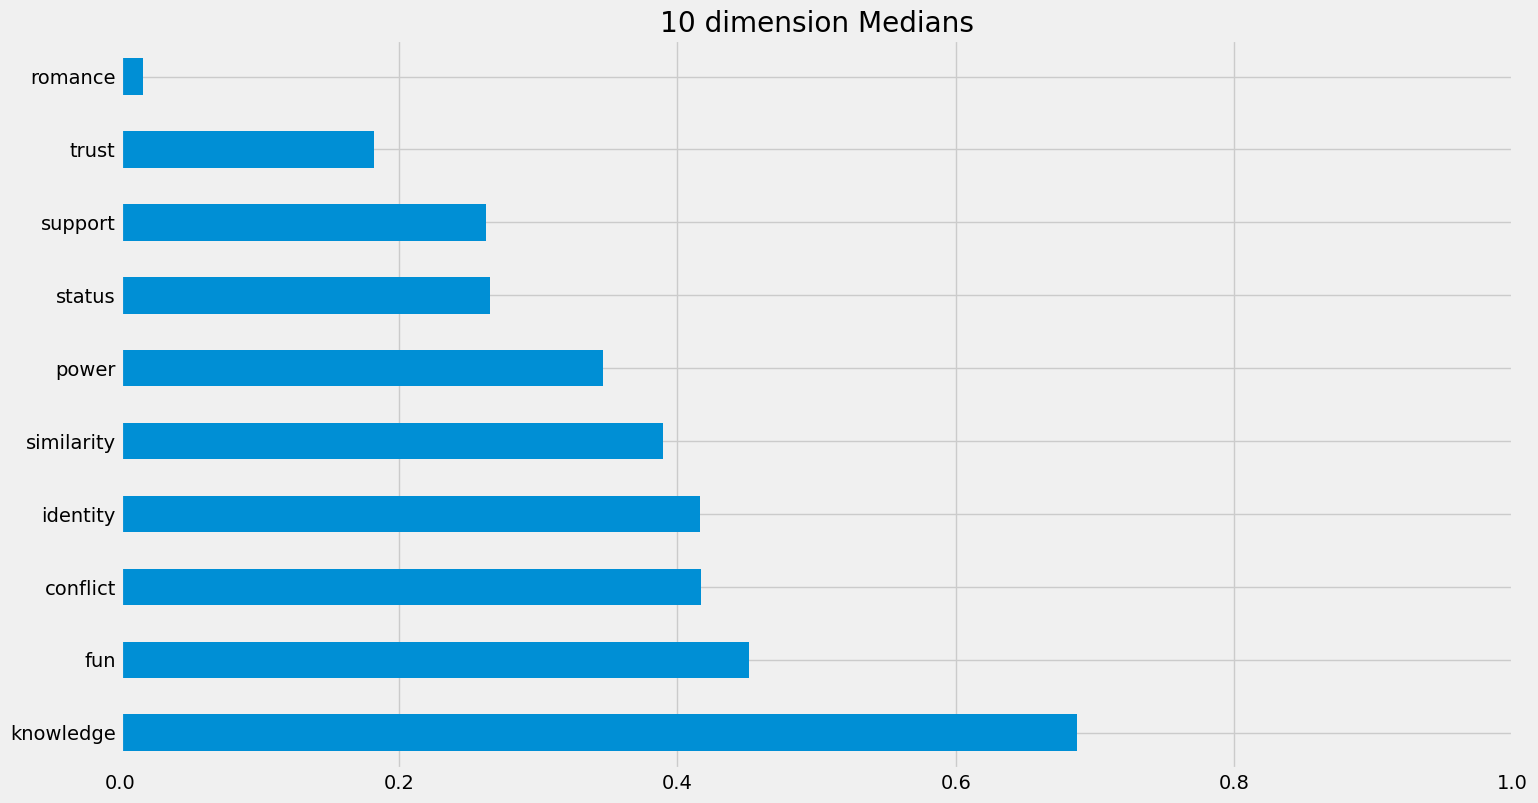

In [6]:
plt.style.use('fivethirtyeight')
plt.title('10 dimension Medians')
raw_data[raw_data.columns[4:14]].median().sort_values(ascending=False).plot(kind='barh',figsize=[16,9],xlim=[0,1])
plt.savefig(viz_path+'barchart.png')

In [7]:
sorted_cols = raw_data[raw_data.columns[4:14]].median().sort_values(ascending=False).index

<AxesSubplot: title={'center': '10-Dimensional Distributions'}>

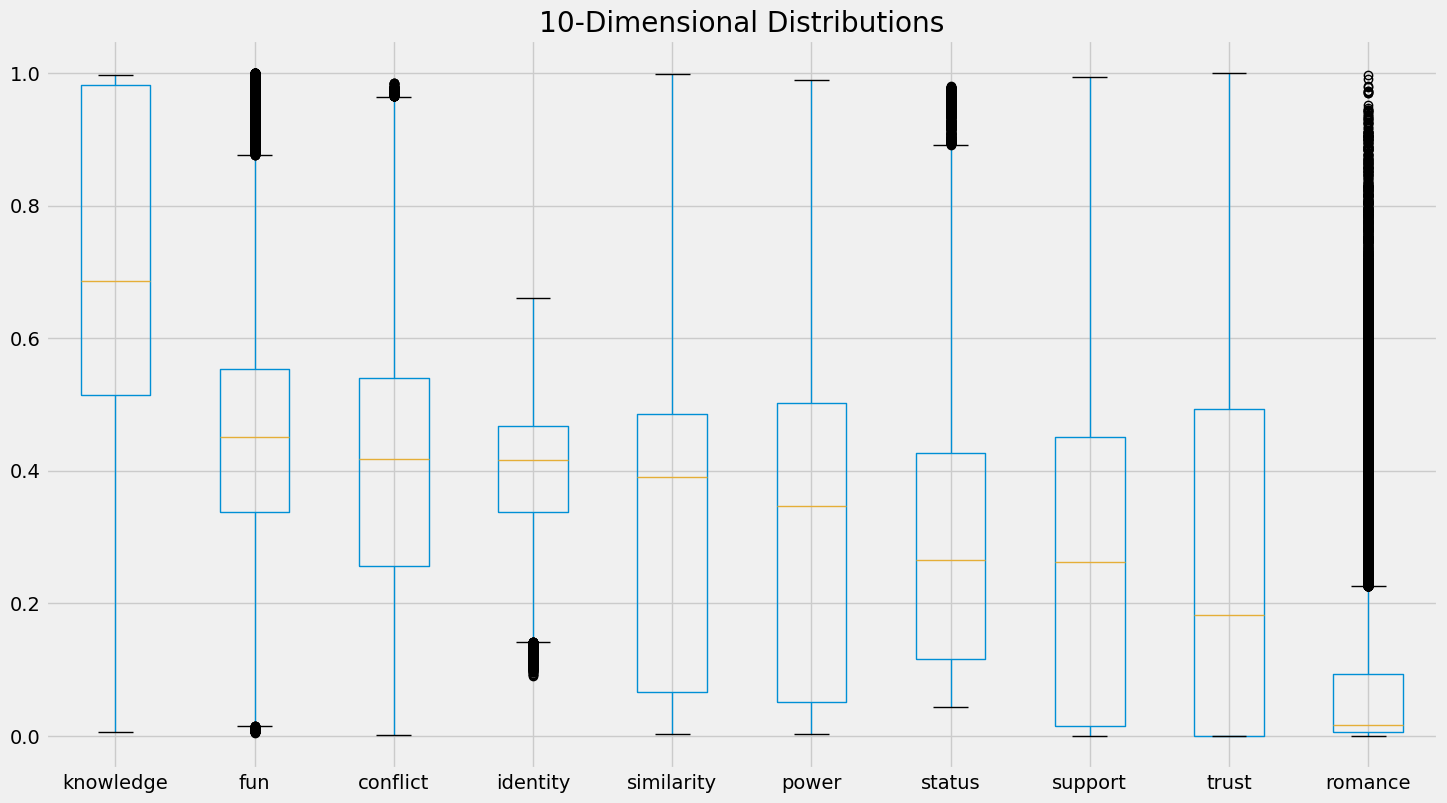

In [37]:
df = raw_data[sorted_cols]
plt.figure(figsize=[16,9])
plt.title('10-Dimensional Distributions')
df.boxplot()

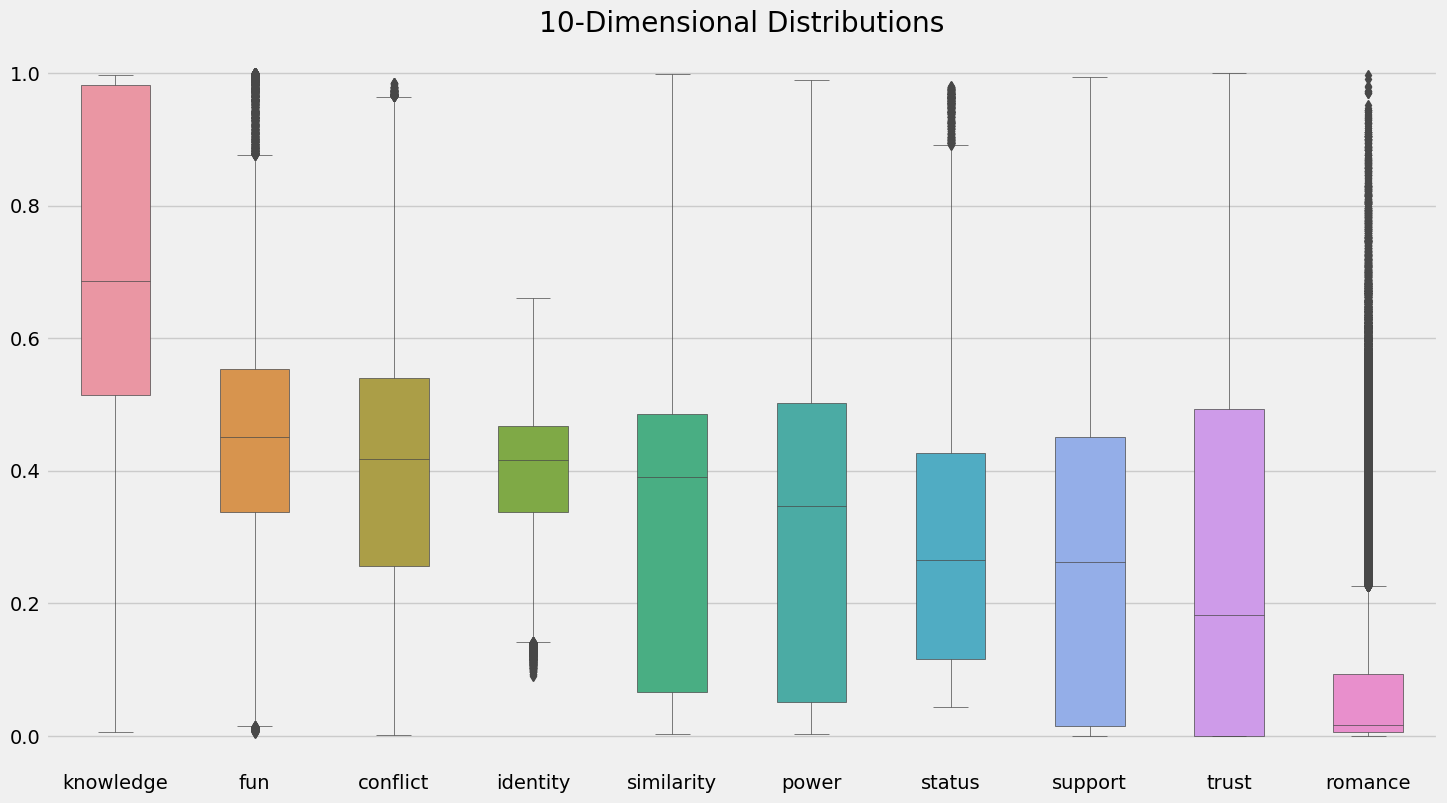

In [48]:
plt.figure(figsize=[16,9])
plt.title('10-Dimensional Distributions')
sns.boxplot(data=df,width=0.5,linewidth=0.5)
plt.savefig(viz_path+'boxplot.png')

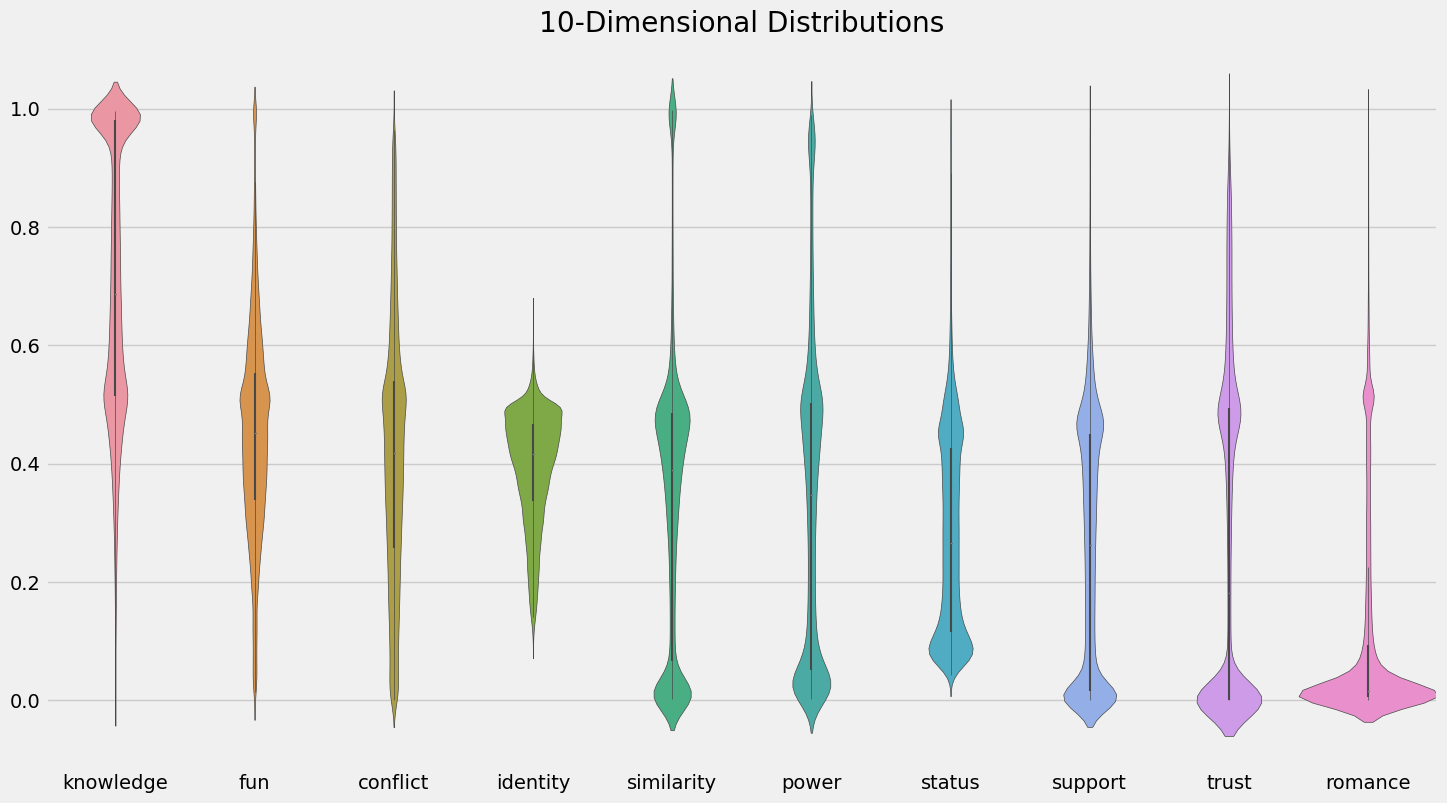

In [51]:
plt.figure(figsize=[16,9])
plt.title('10-Dimensional Distributions')
sns.violinplot(data=df,width=1,linewidth=0.5)
plt.savefig(viz_path+'violinplot.png')

,knowledge,fun,conflict,identity,similarity,power,status,support,trust,romance
0,0.987545,0.404854,0.217982,0.401652,0.008616,0.095460,0.210643,0.012049,8.436824e-07,0.004092
1,0.485023,0.453298,0.503045,0.432057,0.435572,0.518171,0.427520,0.495435,3.306695e-01,0.254124
2,0.491014,0.595824,0.315845,0.443327,0.453668,0.467255,0.453663,0.485220,4.674791e-01,0.571401
3,0.995469,0.099581,0.685344,0.207318,0.003814,0.033478,0.095750,0.000713,8.855732e-07,0.000114
4,0.483014,0.523179,0.488357,0.482162,0.469591,0.434496,0.515467,0.484323,5.038089e-01,0.507920


In [63]:
plt.style.use('fivethirtyeight')

bar_dict = {}
for ix,k in enumerate(dfs.keys()):
    
    
    vals = pd.DataFrame(dfs[k].corr()['Close'].drop('Close'))
    for key,val in vals.iterrows():
        if key not in bar_dict:
            bar_dict['period_type'] = []
            
            bar_dict[key] = [val['Close']]
            
            
            
        else:
            bar_dict[key].append(val['Close'])
            
    
    bar_dict['period_type'].append(k)

    
bar_df = pd.DataFrame(bar_dict).sort_values(['period_type']).set_index('period_type')
fig = px.bar(data_frame=bar_df, barmode="group",range_y=[-1,1])
fig.show()

In [64]:
dflist = []
for k,v in dfs.items():
    v['period_type'] = [k]*v.shape[0]
    dflist.append(v)
df = pd.concat(dflist).sort_values('date')


# Create figure with secondary y-axis
#fig = make_subplots(specs=[[{"secondary_y": True}]])
for period,df in dfs.items():
    for dim in df.columns[1:-2]:
        subfig = make_subplots(specs=[[{"secondary_y": True}]])

        fig2 = px.line(df, x="date", y=dim)
        fig = px.line(df, x="date", y="Close")
        fig2.update_traces(yaxis="y2")

        subfig.add_traces(fig.data + fig2.data)

        # recoloring is necessary otherwise lines from fig und fig2 would share each color
        # e.g. Linear-, Log- = blue; Linear+, Log+ = red... we don't want this

        subfig.for_each_trace(lambda t: t.update(line=dict(color=t.marker.color)))
        title = "{} during a {} event".format(dim[0].upper()+dim[1:],period)
        subfig.update_layout(title = title)
        
        start_date = date(2022,1,1)
        dt_breaks = [single_date for single_date in (start_date + timedelta(n) for n in range(365)) if single_date.strftime('%Y-%m-%d') not in df['date'].values.tolist()]
        subfig.update_xaxes(
            rangebreaks=[dict(values=dt_breaks)] # hide dates with no values
        ) 
        subfig.show()

In [9]:
dtale.show(dfs['positive'])

In [24]:
df.head(30)

,date,conflict,similarity,knowledge,power,status,support,romance,trust,fun,Mean,period_type
0,2022-01-05,1.267992,2.508461,1.975791,1.145824,1.390215,2.642754,0.743740,0.887792,1.556240,1.634052e+07,NoEvent
1,2022-01-06,1.713370,2.850586,2.266710,1.393409,1.653114,2.312850,0.965091,1.317813,1.966742,1.753605e+07,NoEvent
2,2022-01-07,1.880386,2.948336,2.325971,1.368650,1.390215,2.202882,0.743740,1.346481,2.184067,1.721174e+07,NoEvent
3,2022-01-08,1.991731,3.143836,2.385232,1.715270,1.390215,2.312850,0.522389,1.604493,2.256509,1.696174e+07,NoEvent
4,2022-01-09,2.010288,3.021649,2.563016,1.690511,1.390215,1.872977,0.301038,1.604493,2.184067,1.687423e+07,NoEvent
5,2022-01-10,2.232977,2.679524,2.444493,1.938096,1.653114,2.202882,0.301038,1.604493,1.990889,1.681674e+07,NoEvent
6,2022-01-11,2.492781,2.532899,2.482205,2.210440,1.653114,1.763009,0.301038,2.120518,1.676976,1.671205e+07,NoEvent
7,2022-01-12,2.140190,1.921961,2.137412,1.789545,1.214948,1.213169,0.079686,1.547157,1.121590,1.548819e+07,NoEvent
8,2022-02-17,2.399994,1.750898,2.282872,2.408508,1.214948,1.103200,0.522389,1.604493,1.194031,1.532335e+07,NoEvent
9,2022-02-18,1.880386,1.311023,1.776458,1.987613,0.952048,0.223455,0.301038,1.375149,0.686940,1.407124e+07,NoEvent


In [66]:
start_date = date(2022,1,1)
dt_breaks = [single_date for single_date in (start_date + timedelta(n) for n in range(365)) if single_date.strftime('%Y-%m-%d') not in df['date'].values.tolist()]
fig.update_xaxes(
rangebreaks=[dict(values=dt_breaks)] # hide dates with no values
)      

In [68]:
posts_days = raw_data[['date','id']]
posts_pr_day = posts_days.groupby('date').count().reset_index()
posts_pr_day['activity'] = posts_pr_day['id']
posts_pr_day.drop('id',axis=1,inplace=True)
posts_pr_day

,date,activity
0,2022-01-02,178
1,2022-01-03,400
2,2022-01-04,400
3,2022-01-05,400
4,2022-01-06,400
...,...,...
253,2022-09-13,161
254,2022-09-14,335
255,2022-09-16,107
256,2022-09-17,125


In [70]:
corr_dict = {'dimension':[]}
for event_type,df in dfs.items():
    activity_df = pd.merge(df,posts_pr_day,on='date')

    corr_dict[event_type] = []
    cur_corr = activity_df.corr()['Close']
    if not corr_dict['dimension']:
        corr_dict['dimension'] = list(df.columns)[1:10]+['activity']
    for d in corr_dict['dimension']:
        corr_dict[event_type].append(cur_corr[d])
        
        
corr_df = pd.DataFrame(corr_dict).set_index('dimension')

In [209]:
corr_df

,positive,negative,NoEvent
dimension,,,
conflict,-0.170813,-0.131805,0.169857
similarity,-0.379555,-0.090307,-0.205402
knowledge,0.414747,0.016437,0.397716
power,-0.330422,-0.564113,-0.481596
status,-0.484188,0.181493,-0.240938
support,-0.367565,0.032642,-0.318792
identity,-0.370029,0.284355,-0.356739
trust,-0.497703,-0.267634,-0.362828
fun,-0.035805,-0.165636,-0.005771


In [73]:
dtale.show(corr_df)

,date,activity
0,2022-01-02,178
1,2022-01-03,400
2,2022-01-04,400
3,2022-01-05,400
4,2022-01-06,400
...,...,...
253,2022-09-13,161
254,2022-09-14,335
255,2022-09-16,107
256,2022-09-17,125


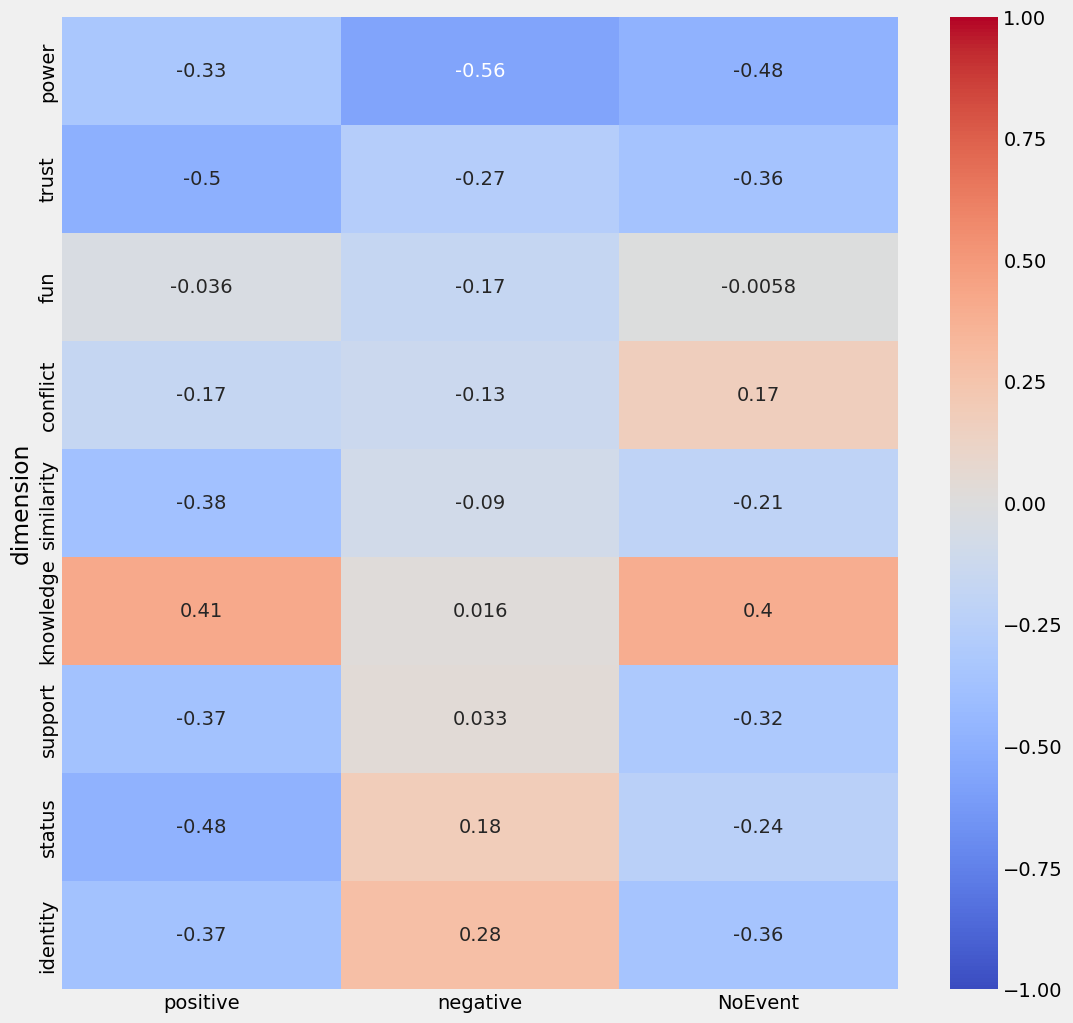

In [210]:
plt.figure(figsize=[12,12])
sns.heatmap(corr_df.drop('activity',axis=0).sort_values('negative'), annot=True,vmin=-1,vmax=1,cmap='coolwarm')
plt.savefig("viz/zscore_price_correlation.png")

# TFIDF

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

tf_dict = {}

for dim in sorted_cols:
    top = raw_data.sort_values(dim,ascending=False).head(100)['corpus'].values.tolist()
    tf_dict[dim] = ' '.join(top)
    


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/askemeineche/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
english_stop_words = set(stopwords.words('english'))
for w in ['bitcoin',
          'https',
          'com',
          'tr',
          'www',
          'ng',
          'nh',
          'th',
          'ch',
          'ti',
          'amp',
          'kh',
          'nan',
          'btc',
          '03',
          'removed',
          'http',
         ]:
    english_stop_words.add(w)
vectorizer = TfidfVectorizer(stop_words=english_stop_words,ngram_range=[2,2])
vectors = vectorizer.fit_transform(tf_dict.values(),tf_dict.keys())

In [32]:
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
tfidf_DF = pd.DataFrame(denselist, columns=feature_names,index = tf_dict.keys())


/Users/askemeineche/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [17]:
""" 
\hline
 Conflict & hatred, mistrust, tense, disappointing, betrayal, hostile\\ 
 \hline
 Fun & funny, humor, playful, comedy, cheer, enjoy, entertaining\\
 \hline
 Identity & community, united, identity, cohesive, integrated\\
 \hline
 Knowledge & teaching, intelligence, competent, expertise, know-how, insight\\
 \hline
 Power & command, control, dominance, authority, pretentious, decisions\\
  \hline
 Respect & admiration, appreciation, praise, thankful, respect, honor\\
  \hline
 Romance & love, sexual, intimacy, partnership, affection, emotional, couple\\
  \hline
 Social Support & friendly, caring, cordial, sympathy, companionship, encouragement\\
  \hline
 Similarity & alike, compatible, equal, congenial, affinity, agreement\\
  \hline
 Trust & trustworthy, honest, reliable, dependability, loyalty, faith\\ [1ex] 
"""

SyntaxError: unexpected character after line continuation character (700086615.py, line 1)

In [33]:
out_frame = {'dimension':[],'bigrams':[]}
for dim in sorted_cols:
    view = tfidf_DF.transpose().sort_values(dim,ascending=False).head(5)
    out_frame['dimension'].append(dim)
    out_frame['bigrams'].append(', '.join(list(view.index)).replace('fuck','f**k'))
pd.DataFrame(out_frame).to_csv('data/final_datasets/top_bigrams.csv',index=None)

In [19]:
kw_df = pd.DataFrame(out_frame)

print("""\\begin{center}
\\begin{table*}[!th]
\centering
 \\begin{tabular}{||c c||} 
 \hline
 Dimension & Keywords \\\ [0.5ex] 
 \hline""")

for k,row in kw_df.iterrows():
    print("\hline")
    print("{} & {}\\\ ".format(row['dimension'],row['bigrams']))

print(""" \hline
  \end{tabular}
\caption{The social dimension with their most frequently appearing words from \cite{choi2020ten}}
\label{tab:social_keywords}
\end{table*}
\end{center}""")

\begin{center}
\begin{table*}[!th]
\centering
 \begin{tabular}{||c c||} 
 \hline
 Dimension & Keywords \\ [0.5ex] 
 \hline
\hline
knowledge & reddit message, message compose, lntipbot subject, compose lntipbot, auto webp\\ 
\hline
fun & youtube watch, alice pub, alice ad, bacon bacon, op checksig\\ 
\hline
conflict & apirl fools, fools apirl, 27 jul, f**k f**k, zero zero\\ 
\hline
identity & central african, african republic, digital assets, united states, fiat debt\\ 
\hline
similarity & preview redd, auto webp, format png, png width, png auto\\ 
\hline
power & preview redd, auto webp, gt gt, png width, format png\\ 
\hline
status & thank much, thanks sharing, investment plan, simply best, manger ever\\ 
\hline
support & deep cleaning, need help, please help, cleaning service, help need\\ 
\hline
trust & platform make, long term, global blockchain, 69 city, make ur\\ 
\hline
romance & love love, lol lol, hi hi, wow wow, made smile\\ 
 \hline
  \end{tabular}
\caption{The social dimensi

In [25]:
kw_df

,dimension,bigrams
0,knowledge,"reddit message, message compose, lntipbot subj..."
1,fun,"youtube watch, alice pub, alice ad, bacon baco..."
2,conflict,"apirl fools, fools apirl, 27 jul, f**k f**k, z..."
3,identity,"central african, african republic, digital ass..."
4,similarity,"preview redd, auto webp, format png, png width..."
5,power,"preview redd, auto webp, gt gt, png width, for..."
6,status,"thank much, thanks sharing, investment plan, s..."
7,support,"deep cleaning, need help, please help, cleanin..."
8,trust,"platform make, long term, global blockchain, 6..."
9,romance,"love love, lol lol, hi hi, wow wow, made smile"


In [53]:
tfidf_DF.transpose().sort_values('knowledge',ascending=False).head(20)

,knowledge,fun,conflict,identity,similarity,power,status,support,trust,romance
message compose,0.419695,0.0,0.0,0.0,0.0,0.237849,0.0,0.0,0.0,0.0
reddit message,0.419695,0.0,0.0,0.0,0.0,0.237849,0.0,0.0,0.0,0.0
compose lntipbot,0.314771,0.0,0.0,0.0,0.0,0.178386,0.0,0.0,0.0,0.0
lntipbot subject,0.314771,0.0,0.0,0.0,0.0,0.178386,0.0,0.0,0.0,0.0
api us,0.104924,0.0,0.0,0.0,0.0,0.059462,0.0,0.0,0.0,0.0
subject balance,0.104924,0.0,0.0,0.0,0.0,0.059462,0.0,0.0,0.0,0.0
put invoice,0.104924,0.0,0.0,0.0,0.0,0.059462,0.0,0.0,0.0,0.0
invoice something,0.104924,0.0,0.0,0.0,0.0,0.059462,0.0,0.0,0.0,0.0
west amazonaws,0.104924,0.0,0.0,0.0,0.0,0.059462,0.0,0.0,0.0,0.0
info balance,0.104924,0.0,0.0,0.0,0.0,0.059462,0.0,0.0,0.0,0.0


In [48]:
mc = raw_data.dropna(subset=['corpus']).loc[(raw_data.dropna(subset=['corpus'])['corpus'].str.contains('message'))&(raw_data.dropna(subset=['corpus'])['corpus'].str.contains('compose'))]

In [49]:
#mc = raw_data.dropna(subset=['corpus']).loc[(raw_data.dropna(subset=['corpus'])['corpus'].str.contains('lntipbot'))]
mc.shape

(280, 21)

In [50]:
rd = raw_data.dropna(subset=['corpus'])

In [51]:
for i in mc['corpus'].values:
    print(i)
    print('\n\n')

your submission has been flagged for removal because it pertains primarily to altcoin discussion and or promotion altcoins are off topic for the bitcoin subreddit please post in the subreddit appropriate to that altcoin instead thank you i am a bot and cannot respond please contact r bitcoin moderators directly via mod mail https www reddit com message compose to 2fr 2fbitcoin if you have questions 



your submission has been flagged for removal because it appears you may be attempting to manipulate other users into buying or selling in your favor i am a bot and cannot respond please contact r bitcoin moderators directly via mod mail https www reddit com message compose to 2fr 2fbitcoin if you have questions 



your submission has been flagged for removal because it pertains primarily to altcoin discussion and or promotion altcoins are off topic for the bitcoin subreddit please post in the subreddit appropriate to that altcoin instead thank you i am a bot and cannot respond please co

In [226]:
raw_data.dropna(subset=['corpus']).shape

(76456, 21)

In [216]:
def remove_sw(tok):
    if isinstance(tok,float):
        return tok
    
    stopwords=[
        "https",
        "com",
        "tr",
        "www",
        "ng",
        "nh",
        "th",
        "ch",
        "ti",
        "amp",
        "kh",
        "removed",
        "http",
        'nan']
    for " "+sw+" " in stopwords:
        tok = tok.replace(sw,'')
    
    return tok

raw_data['corpus'] = raw_data['corpus'].apply(lambda x: remove_sw(x))

In [217]:
raw_data

,date,id,corpus,text_type,conflict,similarity,knowledge,power,status,support,...,romance,trust,fun,High,Low,Mean,Close,event_id,event_type,period_type
0,2022-03-06,t7c3t7,sarn sauron coin bsc gem of 2022 laun now exp...,post,0.217982,0.008616,0.987545,0.095460,0.210643,0.012049,...,0.004092,8.436824e-07,0.404854,39640.176751,38211.647962,38925.912357,38419.983377,1.0,positive,before
1,2022-03-06,t7c9cs,a proposal to you,post,0.503045,0.435572,0.485023,0.518171,0.427520,0.495435,...,0.254124,3.306695e-01,0.453298,39640.176751,38211.647962,38925.912357,38419.983377,1.0,positive,before
2,2022-03-06,t7cbqa,me to buy,post,0.315845,0.453668,0.491014,0.467255,0.453663,0.485220,...,0.571401,4.674791e-01,0.595824,39640.176751,38211.647962,38925.912357,38419.983377,1.0,positive,before
3,2022-03-06,t6xdmv,stupid queson please excuse my ignorance can s...,post,0.685344,0.003814,0.995469,0.033478,0.095750,0.000713,...,0.000114,8.855732e-07,0.099581,39640.176751,38211.647962,38925.912357,38419.983377,1.0,positive,before
4,2022-03-06,t7cf3e,bitcoin,post,0.488357,0.469591,0.483014,0.434496,0.515467,0.484323,...,0.507920,5.038089e-01,0.523179,39640.176751,38211.647962,38925.912357,38419.983377,1.0,positive,before
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77051,2022-09-18,iouvy8t,hi u alfador8 anks for ppi u cryptoenusiast84 ...,comment,0.730620,0.003401,0.995973,0.980206,0.151547,0.000652,...,0.000014,8.378324e-07,0.052759,20127.233948,19387.491348,19757.362648,19419.506191,NaN,NaN,NaN
77052,2022-09-18,iouw6s5,i m very new,comment,0.221113,0.536141,0.441375,0.422223,0.597648,0.516809,...,0.645875,6.132007e-01,0.539723,20127.233948,19387.491348,19757.362648,19419.506191,NaN,NaN,NaN
77053,2022-09-18,iouw7i0,gt a purely peer to peer version of eleconic ...,comment,0.395776,0.093113,0.985907,0.042485,0.083406,0.026649,...,0.009478,8.965515e-01,0.121190,20127.233948,19387.491348,19757.362648,19419.506191,NaN,NaN,NaN
77054,2022-09-18,iouw7s9,e house is 87k how am i goi to buy a a 94k hou...,comment,0.363920,0.168305,0.738788,0.239386,0.104419,0.204042,...,0.012725,1.151722e-06,0.593254,20127.233948,19387.491348,19757.362648,19419.506191,NaN,NaN,NaN


In [218]:
raw_data.to_csv(fpath+'aggregated_dataset.csv',sep=';',index=None)